# Mounting Drive

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Unzipping zip file from drive

In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/cell-images-for-detecting-malaria.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


#Plotting to visualize the data

##Single data plot

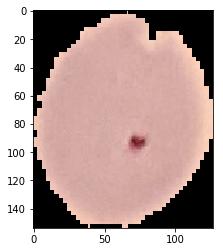

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
plt.imshow(im)
plt.show()

##Multiple random data plot

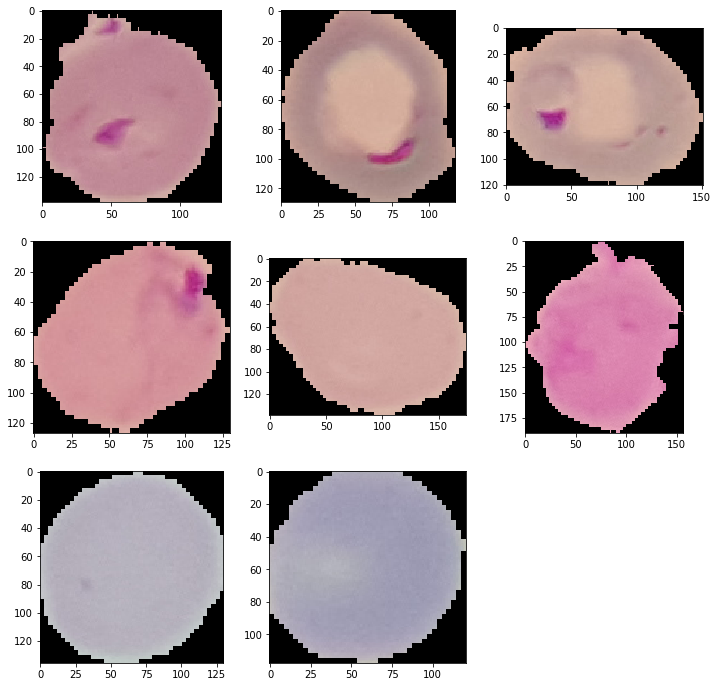

In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #The image module supports basic image loading, rescaling and display operations.

train_parasitized_fnames = os.listdir("/content/cell_images/Parasitized")
train_uninfected_fnames = os.listdir("/content/cell_images/Uninfected")
nrows = 3
ncols = 3
pic_index = 0
pic_index += 4
next_para_pix = [os.path.join("/content/cell_images/Parasitized", fname)
               for fname in train_parasitized_fnames[pic_index-4:pic_index]]
next_un_pix = [os.path.join("/content/cell_images/Uninfected", fname)
               for fname in train_uninfected_fnames[pic_index-4:pic_index]]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, img_path in enumerate(next_para_pix+next_un_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Installing Split Folders

In [0]:
pip install split-folders

## Splitting data with a ratio of 80% and 20%

In [0]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
import split_folders
split_folders.ratio("/content/cell_images", output="output", seed=1337, ratio=(.8, .2)) # default values

# Data Pre-Processing using Image Data Generator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        "/content/output/train", 
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "/content/output/val",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


# Creating a CNN Model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

W0715 12:34:52.104963 139904497846144 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compiling the created model

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

W0715 12:34:52.469549 139904497846144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


##Checking Accuracy of the model

In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=100,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=validation_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/15
100/100 - 17s - loss: 0.6936 - acc: 0.5285 - val_loss: 0.6569 - val_acc: 0.6040
Epoch 2/15
100/100 - 15s - loss: 0.6308 - acc: 0.6665 - val_loss: 0.4139 - val_acc: 0.8710
Epoch 3/15
100/100 - 14s - loss: 0.4123 - acc: 0.8350 - val_loss: 0.2166 - val_acc: 0.9290
Epoch 4/15
100/100 - 14s - loss: 0.2927 - acc: 0.8910 - val_loss: 0.1708 - val_acc: 0.9510
Epoch 5/15
100/100 - 14s - loss: 0.2749 - acc: 0.8985 - val_loss: 0.1786 - val_acc: 0.9590
Epoch 6/15
100/100 - 14s - loss: 0.2518 - acc: 0.9079 - val_loss: 0.1789 - val_acc: 0.9560
Epoch 7/15
100/100 - 15s - loss: 0.2658 - acc: 0.9115 - val_loss: 0.1580 - val_acc: 0.9560
Epoch 8/15
100/100 - 15s - loss: 0.2652 - acc: 0.9055 - val_loss: 0.1620 - val_acc: 0.9530
Epoch 9/15
100/100 - 14s - loss: 0.2339 - acc: 0.9180 - val_loss: 0.2087 - val_acc: 0.9570
Epoch 10/15
100/100 - 14s - loss: 0.2875 - acc: 0.9040 - val_loss: 0.1560 - val_acc: 0.9610
Epoch 11/15
100/100 - 14s - loss: 0.2432 - acc: 0.9160 - val_loss: 0.1579 - val_acc: 0.95

##Plotting the train and test accuracy

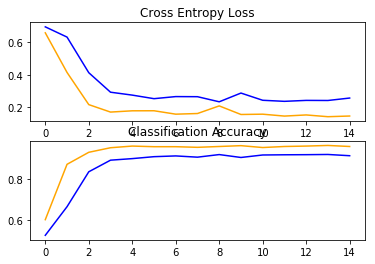

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

## Confusion Matrix

In [0]:
 from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report  
results = confusion_matrix 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',history.history['acc'] )
print ('Report : ')
print (history.history['val_acc']) 


Confusion Matrix :
<function confusion_matrix at 0x7f44101d9950>
Accuracy Score : [0.503, 0.549, 0.5555, 0.6425, 0.8235, 0.87714, 0.904, 0.907, 0.9025, 0.901, 0.903, 0.9065, 0.899, 0.9135, 0.9025]
Report : 
[0.51, 0.632, 0.655, 0.793, 0.866, 0.94, 0.929, 0.934, 0.942, 0.941, 0.942, 0.944, 0.949, 0.953, 0.951]


In [0]:
import tensorflow
pred_input_fn = tensorflow.keras.estimator.inputs.numpy_input_fn(
    x = {'x' : '/content/output/test'},
    y = '/content/output/test',
    num_epochs = 1,
    shuffle = False
    )

y_pred = malaria_detector.predict(input_fn = pred_input_fn)
classes = [p['classes'] for p in y_pred]

AttributeError: ignored

In [0]:
predict_gen = model.predict_generator(test1_generator,
                               steps=50,
                               verbose=1)
#print(predict_gen)

50/50 [==============================] - 1s 29ms/step


In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-07-08 06:30:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   124MB/s    in 0.7s    

2019-07-08 06:30:43 (124 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
# add a global spatial average pooling layer
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = pre_trained_model.get_layer("mixed7")
output = last_layer.output


x = GlobalAveragePooling2D()(output)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs=predictions)

In [0]:
from tensorflow.keras.optimizers import SGD
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=0.001, momentum=0.9, decay=0.01, nesterov=True),
             metrics=['acc'])

In [0]:
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=100,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/10
100/100 - 18s - loss: 0.6624 - acc: 0.6700 - val_loss: 0.6605 - val_acc: 0.7100
Epoch 2/10
100/100 - 17s - loss: 0.6544 - acc: 0.6855 - val_loss: 0.6576 - val_acc: 0.7410
Epoch 3/10
100/100 - 16s - loss: 0.6556 - acc: 0.6915 - val_loss: 0.6587 - val_acc: 0.6380
Epoch 4/10
100/100 - 16s - loss: 0.6566 - acc: 0.6875 - val_loss: 0.6562 - val_acc: 0.6690
Epoch 5/10
100/100 - 17s - loss: 0.6550 - acc: 0.6742 - val_loss: 0.6552 - val_acc: 0.6600
Epoch 6/10
100/100 - 16s - loss: 0.6515 - acc: 0.6985 - val_loss: 0.6536 - val_acc: 0.6650
Epoch 7/10
100/100 - 16s - loss: 0.6459 - acc: 0.7325 - val_loss: 0.6519 - val_acc: 0.6790
Epoch 8/10
100/100 - 17s - loss: 0.6472 - acc: 0.7205 - val_loss: 0.6504 - val_acc: 0.6980
Epoch 9/10
100/100 - 16s - loss: 0.6462 - acc: 0.7205 - val_loss: 0.6493 - val_acc: 0.6940
Epoch 10/10
100/100 - 17s - loss: 0.6445 - acc: 0.7095 - val_loss: 0.6478 - val_acc: 0.7090


In [0]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# wPraveen [2:32 PM]
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['acc'])
# train the model on the new data for a few epochs
model.fit_generator(train_generator,
     steps_per_epoch=100,  # 2000 images = batch_size * steps
     epochs=15,
     validation_data=validation_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)

Epoch 1/15
100/100 - 16s - loss: 0.4650 - acc: 0.8000 - val_loss: 0.4587 - val_acc: 0.8290
Epoch 2/15
100/100 - 13s - loss: 0.4099 - acc: 0.8330 - val_loss: 0.6783 - val_acc: 0.7930
Epoch 3/15
100/100 - 13s - loss: 0.3898 - acc: 0.8445 - val_loss: 0.7230 - val_acc: 0.7900
Epoch 4/15
100/100 - 13s - loss: 0.3558 - acc: 0.8650 - val_loss: 0.8560 - val_acc: 0.7740
Epoch 5/15
100/100 - 13s - loss: 0.3574 - acc: 0.8655 - val_loss: 0.8753 - val_acc: 0.7650
Epoch 6/15
100/100 - 13s - loss: 0.3263 - acc: 0.8820 - val_loss: 1.2645 - val_acc: 0.7200
Epoch 7/15
100/100 - 13s - loss: 0.3466 - acc: 0.8760 - val_loss: 0.5800 - val_acc: 0.8220
Epoch 8/15
100/100 - 13s - loss: 0.3352 - acc: 0.8740 - val_loss: 1.0360 - val_acc: 0.7470
Epoch 9/15
100/100 - 13s - loss: 0.3432 - acc: 0.8802 - val_loss: 0.8803 - val_acc: 0.7910
Epoch 10/15
100/100 - 13s - loss: 0.3150 - acc: 0.8795 - val_loss: 0.7021 - val_acc: 0.8160
Epoch 11/15
100/100 - 12s - loss: 0.3535 - acc: 0.8665 - val_loss: 0.9812 - val_acc: 0.79

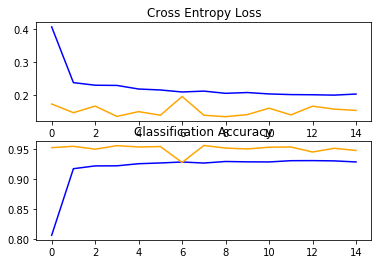

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/25
100/100 - 17s - loss: 0.3418 - acc: 0.8875 - val_loss: 1.6306 - val_acc: 0.7480
Epoch 2/25
100/100 - 13s - loss: 0.3372 - acc: 0.8820 - val_loss: 1.5845 - val_acc: 0.7570
Epoch 3/25
100/100 - 13s - loss: 0.3035 - acc: 0.8910 - val_loss: 1.5596 - val_acc: 0.7630
Epoch 4/25
100/100 - 13s - loss: 0.3218 - acc: 0.8850 - val_loss: 1.5622 - val_acc: 0.7630
Epoch 5/25
100/100 - 13s - loss: 0.2902 - acc: 0.8945 - val_loss: 1.5513 - val_acc: 0.7640
Epoch 6/25
100/100 - 13s - loss: 0.3125 - acc: 0.8860 - val_loss: 1.5268 - val_acc: 0.7650
Epoch 7/25
100/100 - 13s - loss: 0.2874 - acc: 0.9000 - val_loss: 1.5264 - val_acc: 0.7650
Epoch 8/25
100/100 - 13s - loss: 0.2886 - acc: 0.9045 - val_loss: 1.5042 - val_acc: 0.7650
Epoch 9/25
100/100 - 13s - loss: 0.2920 - acc: 0.8965 - val_loss: 1.4959 - val_acc: 0.7660
Epoch 10/25
100/100 - 13s - loss: 0.2935 - acc: 0.8973 - val_loss: 1.4941 - val_acc: 0.7670
Epoch 11/25
100/100 - 12s - loss: 0.3001 - acc: 0.8940 - val_loss: 1.4975 - val_acc: 0.76

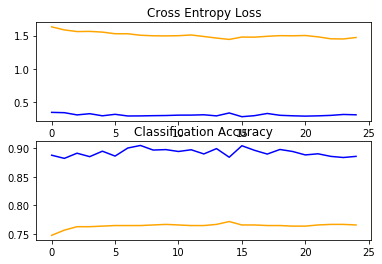

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
model1 = tensorflow.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, 
                                                         weights='imagenet', 
                                                         input_shape=(150,150,3))

219062272/219055592 [==============================] - 8s 0us/step


In [0]:
model1.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
________________________________________________________________________________

In [0]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
# add a global spatial average pooling layer
for layer in pre_trained_model.layers:
    layer.trainable = False
    
last_layer = model1.get_layer("mixed_7a")
output = last_layer.output


x = GlobalAveragePooling2D()(output)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model1.input, outputs=predictions)

In [0]:
from tensorflow.keras.optimizers import SGD
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
             optimizer=SGD(lr=0.001, momentum=0.9, decay=0.01, nesterov=True),
             metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 97s - loss: 0.6836 - acc: 0.5700 - val_loss: 0.6823 - val_acc: 0.7700
Epoch 2/10
100/100 - 59s - loss: 0.6630 - acc: 0.6685 - val_loss: 0.6668 - val_acc: 0.8120
Epoch 3/10
100/100 - 59s - loss: 0.6309 - acc: 0.7311 - val_loss: 0.6301 - val_acc: 0.8790
Epoch 4/10
100/100 - 58s - loss: 0.5897 - acc: 0.7790 - val_loss: 0.5727 - val_acc: 0.8840
Epoch 5/10
100/100 - 58s - loss: 0.5519 - acc: 0.8240 - val_loss: 0.5174 - val_acc: 0.8870
Epoch 6/10
100/100 - 59s - loss: 0.5176 - acc: 0.8430 - val_loss: 0.4707 - val_acc: 0.8880
Epoch 7/10
100/100 - 59s - loss: 0.4913 - acc: 0.8265 - val_loss: 0.4434 - val_acc: 0.8970
Epoch 8/10
100/100 - 58s - loss: 0.4564 - acc: 0.8590 - val_loss: 0.4205 - val_acc: 0.8920
Epoch 9/10
100/100 - 58s - loss: 0.4518 - acc: 0.8400 - val_loss: 0.4074 - val_acc: 0.8970
Epoch 10/10
100/100 - 58s - loss: 0.4404 - acc: 0.8490 - val_loss: 0.3978 - val_acc: 0.9050


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

trained1_model = VGG16(include_top=False, 
                      weights="imagenet", 
                      input_shape=(150,150,3))

In [0]:
trained1_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
from tensorflow.keras import Model,layers

    
last_layer = trained1_model.get_layer("block5_conv3")
output = last_layer.output

x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
y = layers.Dense(1, activation='sigmoid')(x)

model = Model(trained1_model.input, y)


In [0]:
from tensorflow.keras.optimizers import SGD


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.0001, 
                  momentum=0.9),
              metrics=['acc'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/20
100/100 - 41s - loss: 0.6891 - acc: 0.5500 - val_loss: 0.6521 - val_acc: 0.7040
Epoch 2/20
100/100 - 36s - loss: 0.6355 - acc: 0.6385 - val_loss: 0.5512 - val_acc: 0.8280
Epoch 3/20
100/100 - 36s - loss: 0.5201 - acc: 0.7630 - val_loss: 0.3982 - val_acc: 0.8080
Epoch 4/20
100/100 - 36s - loss: 0.3547 - acc: 0.8620 - val_loss: 0.3102 - val_acc: 0.8520
Epoch 5/20
100/100 - 36s - loss: 0.3168 - acc: 0.8765 - val_loss: 0.2169 - val_acc: 0.9260
Epoch 6/20
100/100 - 36s - loss: 0.2865 - acc: 0.8885 - val_loss: 0.1931 - val_acc: 0.9360
Epoch 7/20
100/100 - 38s - loss: 0.2679 - acc: 0.9013 - val_loss: 0.1852 - val_acc: 0.9500
Epoch 8/20
100/100 - 36s - loss: 0.2529 - acc: 0.9110 - val_loss: 0.1881 - val_acc: 0.9400
Epoch 9/20
100/100 - 36s - loss: 0.2585 - acc: 0.9060 - val_loss: 0.1782 - val_acc: 0.9440
Epoch 10/20
100/100 - 36s - loss: 0.2251 - acc: 0.9225 - val_loss: 0.1576 - val_acc: 0.9500
Epoch 11/20
100/100 - 36s - loss: 0.2442 - acc: 0.9075 - val_loss: 0.1511 - val_acc: 0.95

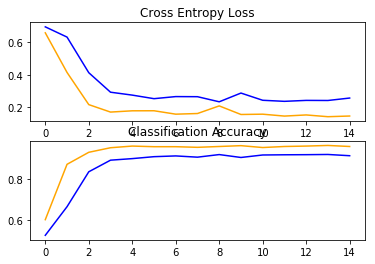

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

In [0]:
flag = False

for layer in trained1_model.layers:
  if flag:
    layer.trainable = True
  if layer.name == 'block4_conv3':
    flag = True

In [0]:
from tensorflow.keras.optimizers import SGD


model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.0001, 
                  momentum=0.9),
              metrics=['acc'])

In [0]:
X = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25,
      verbose=2)

Epoch 1/20
100/100 - 38s - loss: 0.1948 - acc: 0.9310 - val_loss: 0.1402 - val_acc: 0.9580
Epoch 2/20
100/100 - 36s - loss: 0.1895 - acc: 0.9340 - val_loss: 0.1312 - val_acc: 0.9580
Epoch 3/20
100/100 - 36s - loss: 0.2122 - acc: 0.9255 - val_loss: 0.1361 - val_acc: 0.9600
Epoch 4/20
100/100 - 36s - loss: 0.1996 - acc: 0.9245 - val_loss: 0.1280 - val_acc: 0.9580
Epoch 5/20
100/100 - 36s - loss: 0.1998 - acc: 0.9340 - val_loss: 0.1270 - val_acc: 0.9600
Epoch 6/20
100/100 - 36s - loss: 0.2111 - acc: 0.9230 - val_loss: 0.1294 - val_acc: 0.9600
Epoch 7/20
100/100 - 36s - loss: 0.2185 - acc: 0.9265 - val_loss: 0.1300 - val_acc: 0.9580
Epoch 8/20
100/100 - 36s - loss: 0.1855 - acc: 0.9375 - val_loss: 0.1305 - val_acc: 0.9560
Epoch 9/20
100/100 - 36s - loss: 0.1899 - acc: 0.9360 - val_loss: 0.1311 - val_acc: 0.9600
Epoch 10/20
100/100 - 36s - loss: 0.2033 - acc: 0.9305 - val_loss: 0.1272 - val_acc: 0.9560
Epoch 11/20
100/100 - 36s - loss: 0.1815 - acc: 0.9360 - val_loss: 0.1263 - val_acc: 0.96

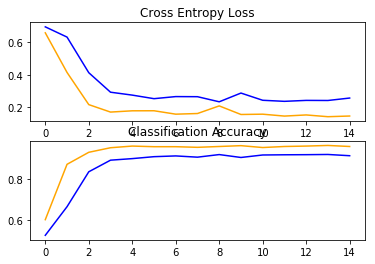

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()